<h1 style = "font-size:3rem;color:darkcyan"> Preprocessing Data</h1>


In [71]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import json

In [72]:
# import dataset
root = '../../../Datasets/Speech/Speech Commands/'
sample_rate = 22050
n_samples = sample_rate
hop_length = 512
n_fft = 2048
n_mfcc = 13 

In [73]:
 # data dictionary 
data  = {
    'mappings' : [],  # corresponding word
    'labels' : [],    # corresponding number
    'MFCC' : [],      # extracted mfcc
    'filenames' : []  # original filenames
 }

# go trough all sub folders
n_folders = len(os.listdir(root))
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(root)):
    # skip root dir
    if dirpath is not root:
        print(f'processing folder {i} out of {n_folders}')
        
        # extract and append 
        category = dirpath.split('/')[-1] # last index in list when split
        data['mappings'].append(category)

        for file in filenames:
            file_path = os.path.join(dirpath + '/' + file)
            audio_data, _ = librosa.load(file_path, sr= sample_rate, mono=True)

            # ignore < 1 sec of audio
            if len(audio_data) >= n_samples:

                # crop audio when larger
                if len(audio_data > n_samples):
                    audio_data = audio_data[:n_samples] 

                # extract the MFCC
                mfcc = librosa.feature.mfcc(y = audio_data, 
                                                    sr = sample_rate, 
                                                    n_mfcc = n_mfcc, 
                                                    n_fft = 2048, 
                                                    hop_length = hop_length)

                # store data
                data['labels'].append(i-1)
                data['MFCC'].append(mfcc.T.tolist())
                data['filenames'].append(file)


processing folder 1 out of 35
processing folder 2 out of 35
processing folder 3 out of 35
processing folder 4 out of 35
processing folder 5 out of 35
processing folder 6 out of 35
processing folder 7 out of 35
processing folder 8 out of 35
processing folder 9 out of 35
processing folder 10 out of 35
processing folder 11 out of 35
processing folder 12 out of 35
processing folder 13 out of 35
processing folder 14 out of 35
processing folder 15 out of 35
processing folder 16 out of 35
processing folder 17 out of 35
processing folder 18 out of 35
processing folder 19 out of 35
processing folder 20 out of 35
processing folder 21 out of 35
processing folder 22 out of 35
processing folder 23 out of 35
processing folder 24 out of 35
processing folder 25 out of 35
processing folder 26 out of 35
processing folder 27 out of 35
processing folder 28 out of 35
processing folder 29 out of 35
processing folder 30 out of 35
processing folder 31 out of 35
processing folder 32 out of 35
processing folder

In [74]:
# save to json file 
json_path = 'data.json'
with open(json_path, 'w') as fp:
    json.dump(data, fp, indent = 4)

In [78]:
print(f'number of selected audio files {np.shape(data["MFCC"])[0]}')
print(f'number of time frames {np.shape(data["MFCC"])[1]}')
print(f'number of mfcc {np.shape(data["MFCC"])[2]}')

number of selected audio files 95394
number of time frames 44
number of mfcc 13


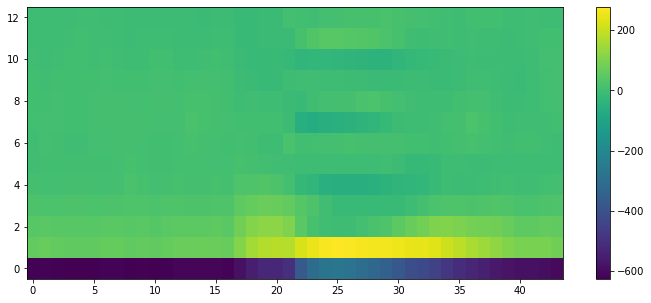

In [97]:
# visualizing some data
fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

img = ax.imshow(np.array(data["MFCC"][9000]).T)
fig.colorbar(img)
plt.gca().invert_yaxis()
ax.set_aspect('auto')